# THE SPARKS FOUNDATION

# GRIPDEC 20

# NAME - HARSHIT GUPTA

# STEP-1 imprting the libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
%matplotlib inline

# STEP-2 Reading data

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.shape

(150, 6)

In [8]:
df.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

# STEP 3 Data Visualization

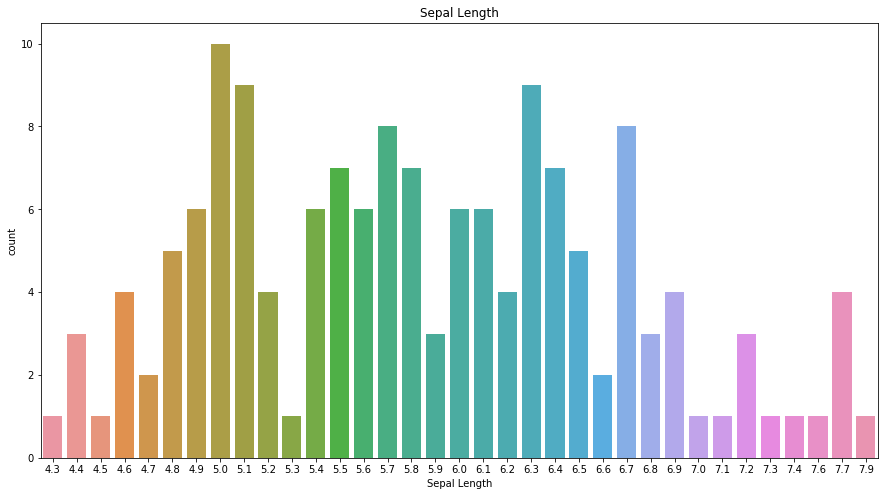

In [9]:
#The dataset has no null values so we can do data visualization
plt.figure(figsize=(15,8))
sns.countplot(df["SepalLengthCm"])
plt.title("Sepal Length")
plt.xlabel("Sepal Length")
plt.show()

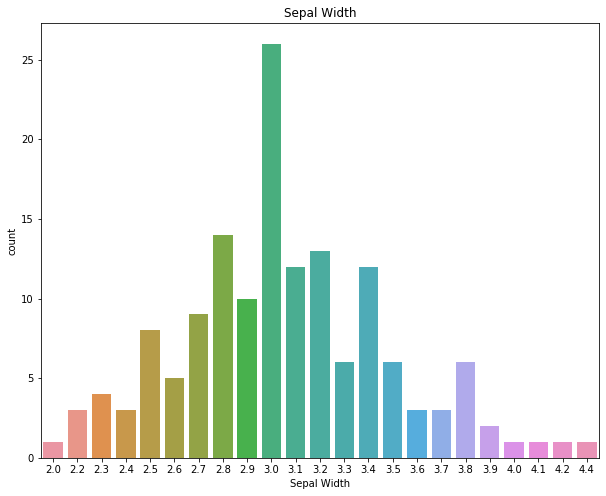

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(df["SepalWidthCm"])
plt.title("Sepal Width")
plt.xlabel("Sepal Width")
plt.show()

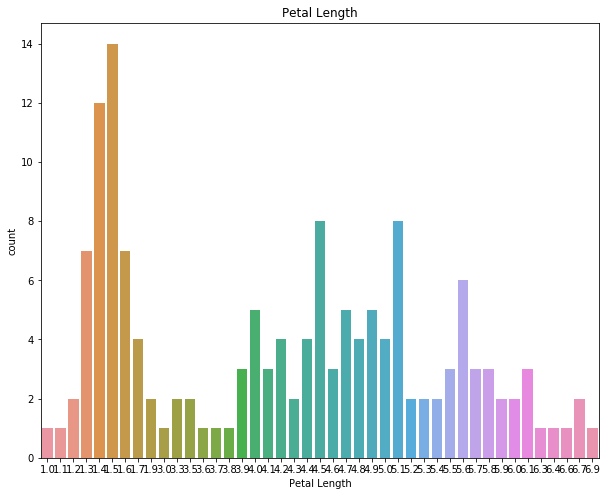

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(df["PetalLengthCm"])
plt.title("Petal Length")
plt.xlabel("Petal Length")
plt.show()

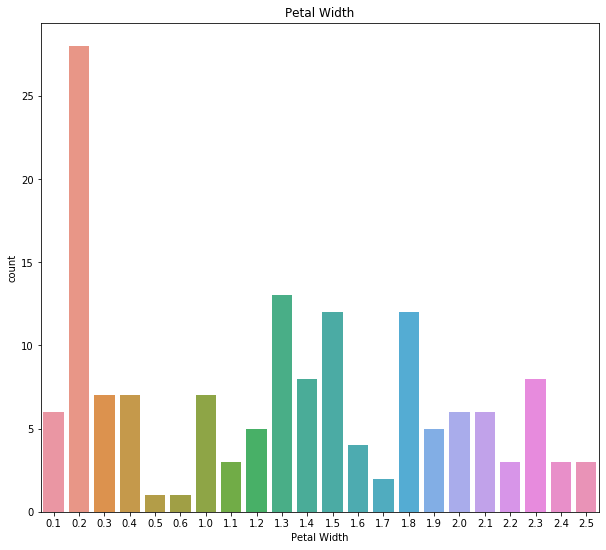

In [15]:
plt.figure(figsize=(10,9))
sns.countplot(df["PetalWidthCm"])
plt.title("Petal Width")
plt.xlabel("Petal Width")
plt.show()

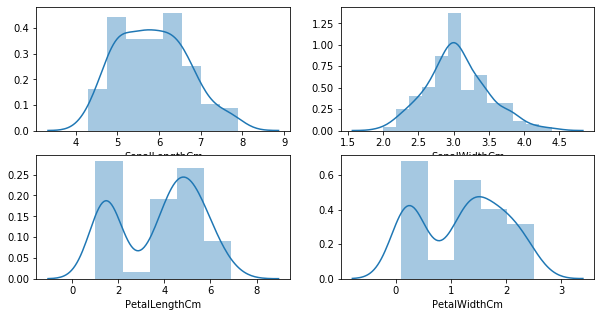

In [16]:
#Checking the dataset and analysing it
fig,ax=plt.subplots(2,2,figsize=(10,5))
plt1=sns.distplot(df["SepalLengthCm"],ax=ax[0,0])
plt2=sns.distplot(df["SepalWidthCm"],ax=ax[0,1])
plt3=sns.distplot(df["PetalLengthCm"],ax=ax[1,0])
plt4=sns.distplot(df["PetalWidthCm"],ax=ax[1,1])

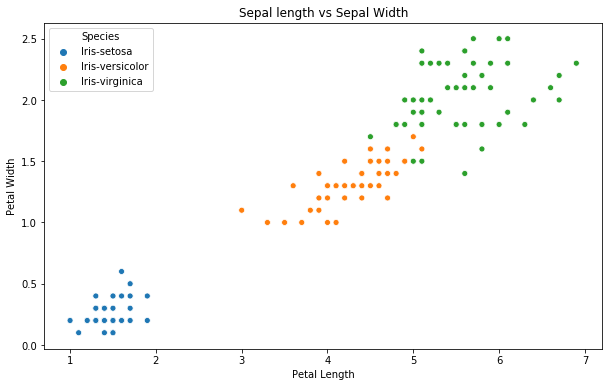

In [18]:
#Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm",data=df,hue="Species")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Sepal length vs Sepal Width")
plt.show()

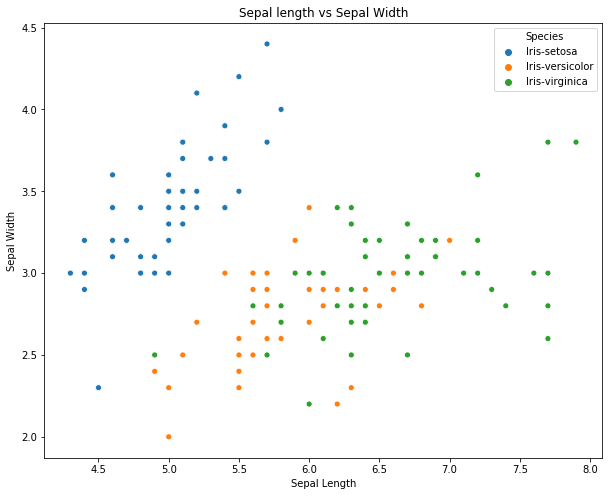

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",data=df,hue="Species")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal length vs Sepal Width")
plt.show()

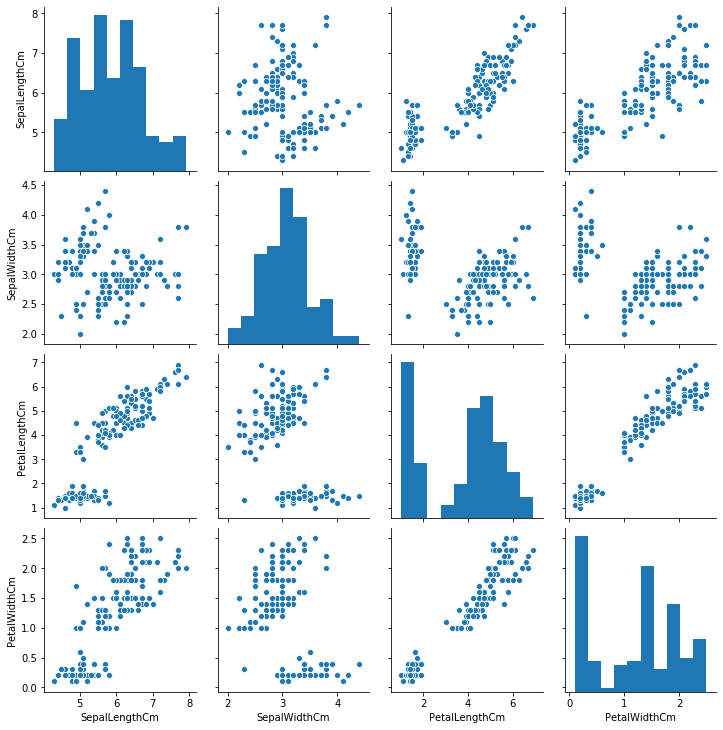

In [23]:
# pairplot
sns.pairplot(df.iloc[:,1:])

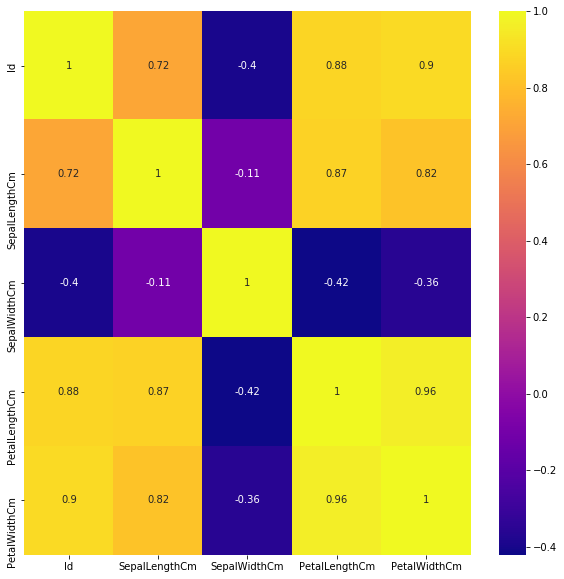

In [24]:
#correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="plasma")
plt.show()

# STEP 4 Clusters for k means

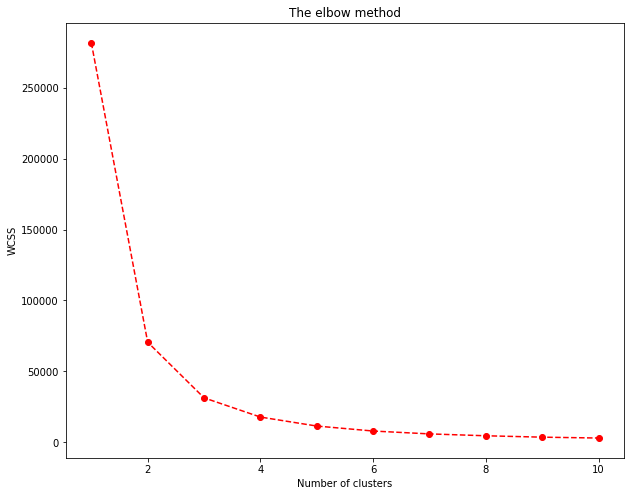

In [25]:
plt.figure(figsize=(10,8))
x=df.iloc[:,[0,1,2,3]].values
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0).fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,'ro--')
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel('WCSS')
plt.show()


In [26]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

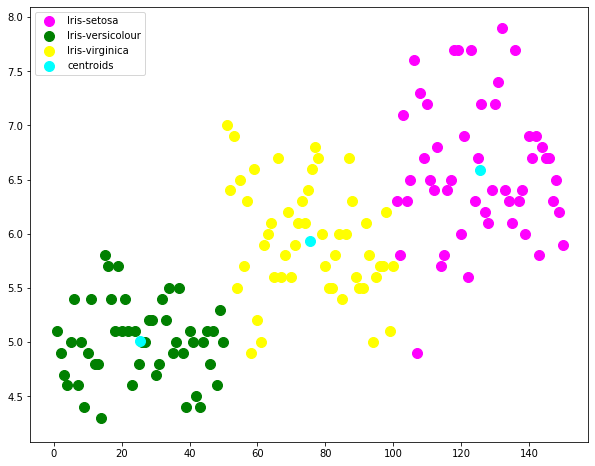

In [27]:
plt.figure(figsize=(10,8))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c="magenta",label="Iris-setosa")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='green',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='Yellow',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='aqua',label='centroids')
plt.legend()
plt.show()